https://h2o-release.s3.amazonaws.com/h2o/rel-ueno/2/docs-website/h2o-py/docs/frame.html

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from inspect import signature

import wget
import os
import sys
from zipfile import ZipFile

import ipywidgets as widgets
from IPython import display

import h2o
from h2o.frame import H2OFrame

from tqdm import tqdm
tqdm.pandas()

In [0]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)

In [0]:
# filename = wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip')
# filename

In [0]:
PATH = '/home/classifier_data/uci_bank_marketing/'
PATH

'/home/classifier_data/uci_bank_marketing/'

In [0]:
os.listdir(PATH)

['.ipynb_checkpoints',
 'UCI_Bank_Marketing.ipynb',
 'bank-additional.zip',
 '__MACOSX',
 'bank-additional',
 'AV_WNS_Feature_Eng.ipynb',
 'AV_WNS_H2O.ipynb',
 'AV_WNS_H2O_XGBoost.ipynb',
 'UCI_Credit_Card_Default.ipynb']

In [0]:
# opening the zip file in READ mode 
file_name = 'bank-additional.zip'
with ZipFile(f"{PATH}{file_name}", 'r') as zp: 
    # printing all the contents of the zip file 
    zp.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zp.extractall() 
    print('Done!') 

File Name                                             Modified             Size
bank-additional/                               2014-03-26 11:28:00            0
bank-additional/.DS_Store                      2014-03-25 10:52:16         6148
__MACOSX/                                      2014-03-26 11:28:12            0
__MACOSX/bank-additional/                      2014-03-26 11:28:12            0
__MACOSX/bank-additional/._.DS_Store           2014-03-25 10:52:16           82
bank-additional/.Rhistory                      2014-03-25 16:27:14         3943
bank-additional/bank-additional-full.csv       2014-03-26 11:22:30      5834924
bank-additional/bank-additional-names.txt      2014-03-26 11:27:36         5458
bank-additional/bank-additional.csv            2014-03-26 11:23:34       583898
__MACOSX/._bank-additional                     2014-03-26 11:28:00          205
Extracting all the files now...
Done!


In [0]:
os.listdir(PATH)

['.ipynb_checkpoints',
 'UCI_Bank_Marketing.ipynb',
 'bank-additional.zip',
 '__MACOSX',
 'bank-additional',
 'AV_WNS_Feature_Eng.ipynb',
 'AV_WNS_H2O.ipynb',
 'AV_WNS_H2O_XGBoost.ipynb',
 'UCI_Credit_Card_Default.ipynb']

In [0]:
for curr_dir, subdirs, files in os.walk(f'{PATH}bank-additional'):
    print(curr_dir)
    print(subdirs)
    print(files)

/home/classifier_data/uci_bank_marketing/bank-additional
[]
['.DS_Store', '.Rhistory', 'bank-additional-full.csv', 'bank-additional-names.txt', 'bank-additional.csv']


In [0]:
!wc -l ./bank-additional/bank-additional-full.csv
!wc -l ./bank-additional/bank-additional.csv

41189 ./bank-additional/bank-additional-full.csv
4120 ./bank-additional/bank-additional.csv


In [0]:
!head -2 ./bank-additional/bank-additional-full.csv

In [0]:
!head -2 ./bank-additional/bank-additional.csv

In [0]:
!tail -30 $PATH/bank-additional/bank-additional-names.txt

In [0]:
feature_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                  'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                  'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
                   'euribor3m', 'nr_employed']

target_column = 'deposit_subscribed'

### Initialize H2O

In [0]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,4 days 23 hours 48 mins
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,"14 days, 18 hours and 38 minutes"
H2O cluster name:,H2O_from_python_root_tsdv7b
H2O cluster total nodes:,1
H2O cluster free memory:,21.48 Gb
H2O cluster total cores:,112
H2O cluster allowed cores:,112
H2O cluster status:,"locked, healthy"


### Read the dataset

In [0]:
df_bank_trn = pd.read_csv(f"{PATH}bank-additional/bank-additional-full.csv", sep=';')                              
df_bank_tst = pd.read_csv(f"{PATH}bank-additional/bank-additional.csv", sep=';')                              

In [0]:
df_bank_trn.shape, df_bank_tst.shape

((41188, 21), (4119, 21))

In [0]:
df_bank_trn.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
df_bank_tst.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [0]:
df_bank_trn.columns = feature_columns+[target_column]
df_bank_tst.columns = feature_columns+[target_column]

In [0]:
df_bank_trn.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
df_bank_tst.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [0]:
df_bank_h2o_trn = h2o.H2OFrame(df_bank_trn)
df_bank_h2o_tst = h2o.H2OFrame(df_bank_tst)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


# EDA

### Missing Value Check
> Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

In [0]:
# merge training and testing dataset
df_bank_h2o_all = df_bank_h2o_trn.rbind(df_bank_h2o_tst)

In [0]:
df_bank_all = pd.concat([df_bank_trn, df_bank_tst], sort=False, axis=0).reset_index(drop=True)

In [0]:
df_bank_all.loc[:len(df_bank_trn), 'is_test'] = [False]
df_bank_all.loc[len(df_bank_trn):, 'is_test'] = [True]

In [0]:
df_bank_h2o_all.shape, df_bank_all.shape

((45307, 21), (45307, 22))

In [0]:
df_bank_h2o_all.head(5)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [0]:
df_bank_all.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed,is_test
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False


In [0]:
# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()

df = pd.DataFrame([df_bank_h2o_all.nacnt()], columns=feature_columns+[target_column],
             dtype='int')

# render in output widgets
with widget1:
    display.display(df.iloc[:, :(len(df.columns) // 2)].T)
with widget2:
    display.display(df.iloc[:, (len(df.columns) // 2):].T)

# create VBox
hbox = widgets.HBox([widget1, widget2])

# render vbox
hbox

### Target Class Distribution


In [0]:
# In training data
df_bank_h2o_trn[target_column].table()

deposit_subscribed,Count
no,36548
yes,4640


### Check Data Types of Each Columns

In [0]:
h2o.H2OFrame(df_bank_h2o_all.types)

Parse progress: |█████████████████████████████████████████████████████████| 100%


age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed
int,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,enum,real,real,real,real,real,enum


### Find Categorical Features and their Distribution

In [0]:
# find if any categorical variable exists
df_bank_h2o_all.anyfactor()

True

In [0]:
# find which columns are categorical
categ_columns = [df_bank_h2o_all.names[int(col_index)] 
                              for col_index in df_bank_h2o_all.columns_by_type(coltype='categorical')]
categ_columns.remove(target_column)
h2o.H2OFrame([categ_columns])

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome


In [0]:
# convert all categorical features into factors
for c in categ_columns:
    df_bank_h2o_trn[c] = df_bank_h2o_trn[c].asfactor()

In [0]:
# convert all categorical features into factors
for c in categ_columns:
    df_bank_trn[c] = df_bank_trn[c].astype('category')

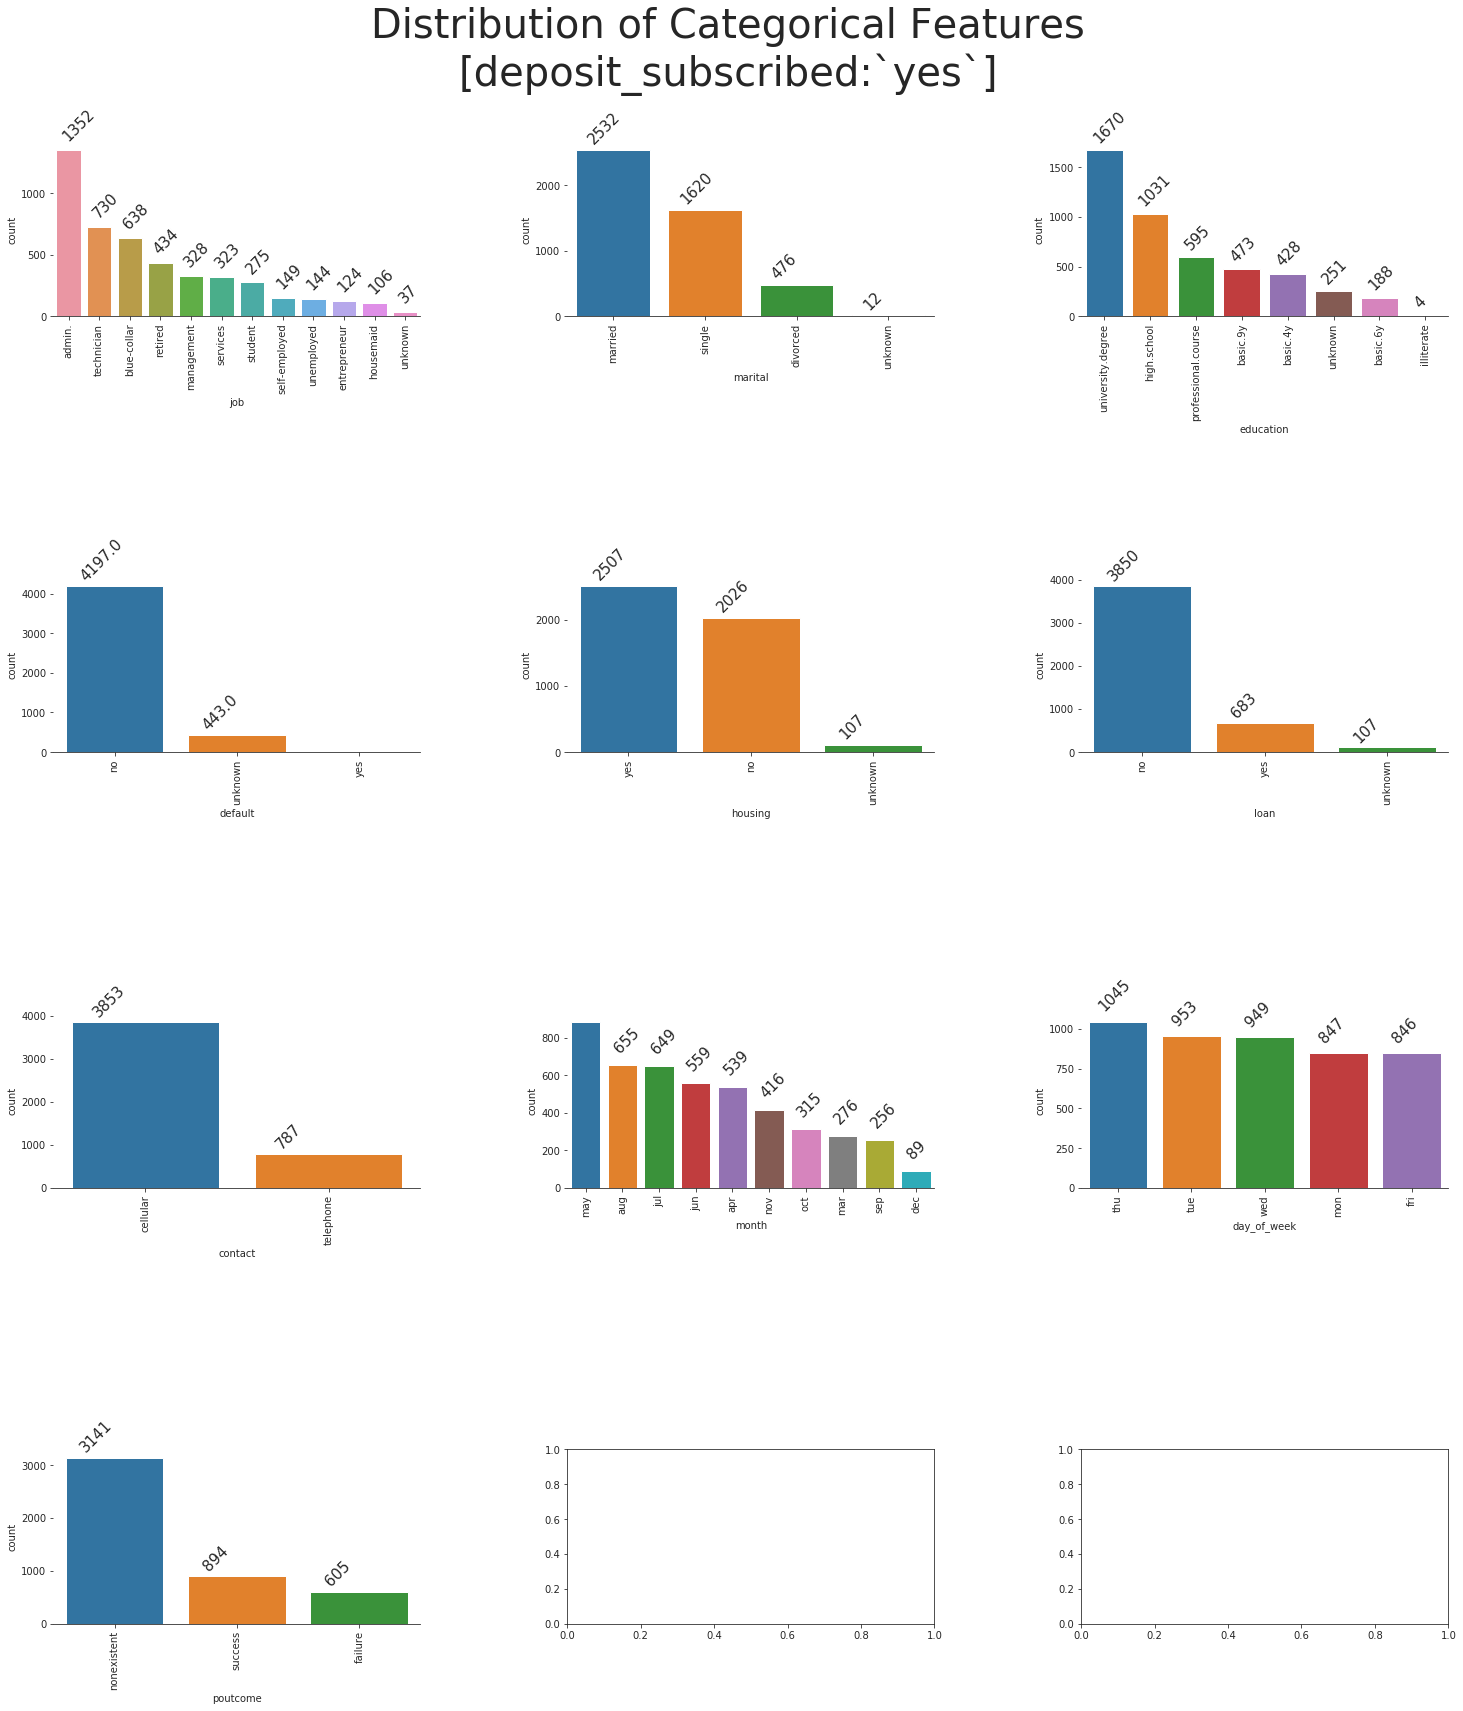

In [0]:
sns.set_style("ticks")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 21))
fig.suptitle(f"Distribution of Categorical Features\n[{target_column}:`yes`]",
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)

plt.rcParams.update({'font.size': 15})
fig.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)
for ax, c in list(zip(axes.flat, categ_columns)):    
    
    sns.countplot(c, data=df_bank_trn[df_bank_trn[target_column]=='yes'],                  
                  order= df_bank_trn[df_bank_trn[target_column]=='yes'][c].value_counts().index,
                  ax=ax)
    for p in ax.patches:
        ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                       ha='left', va='bottom', rotation=45)
    ax.tick_params(labelrotation=90)  
    plt.sca(ax)
    plt.yticks(rotation=0)    
    # ax.axis('off')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    

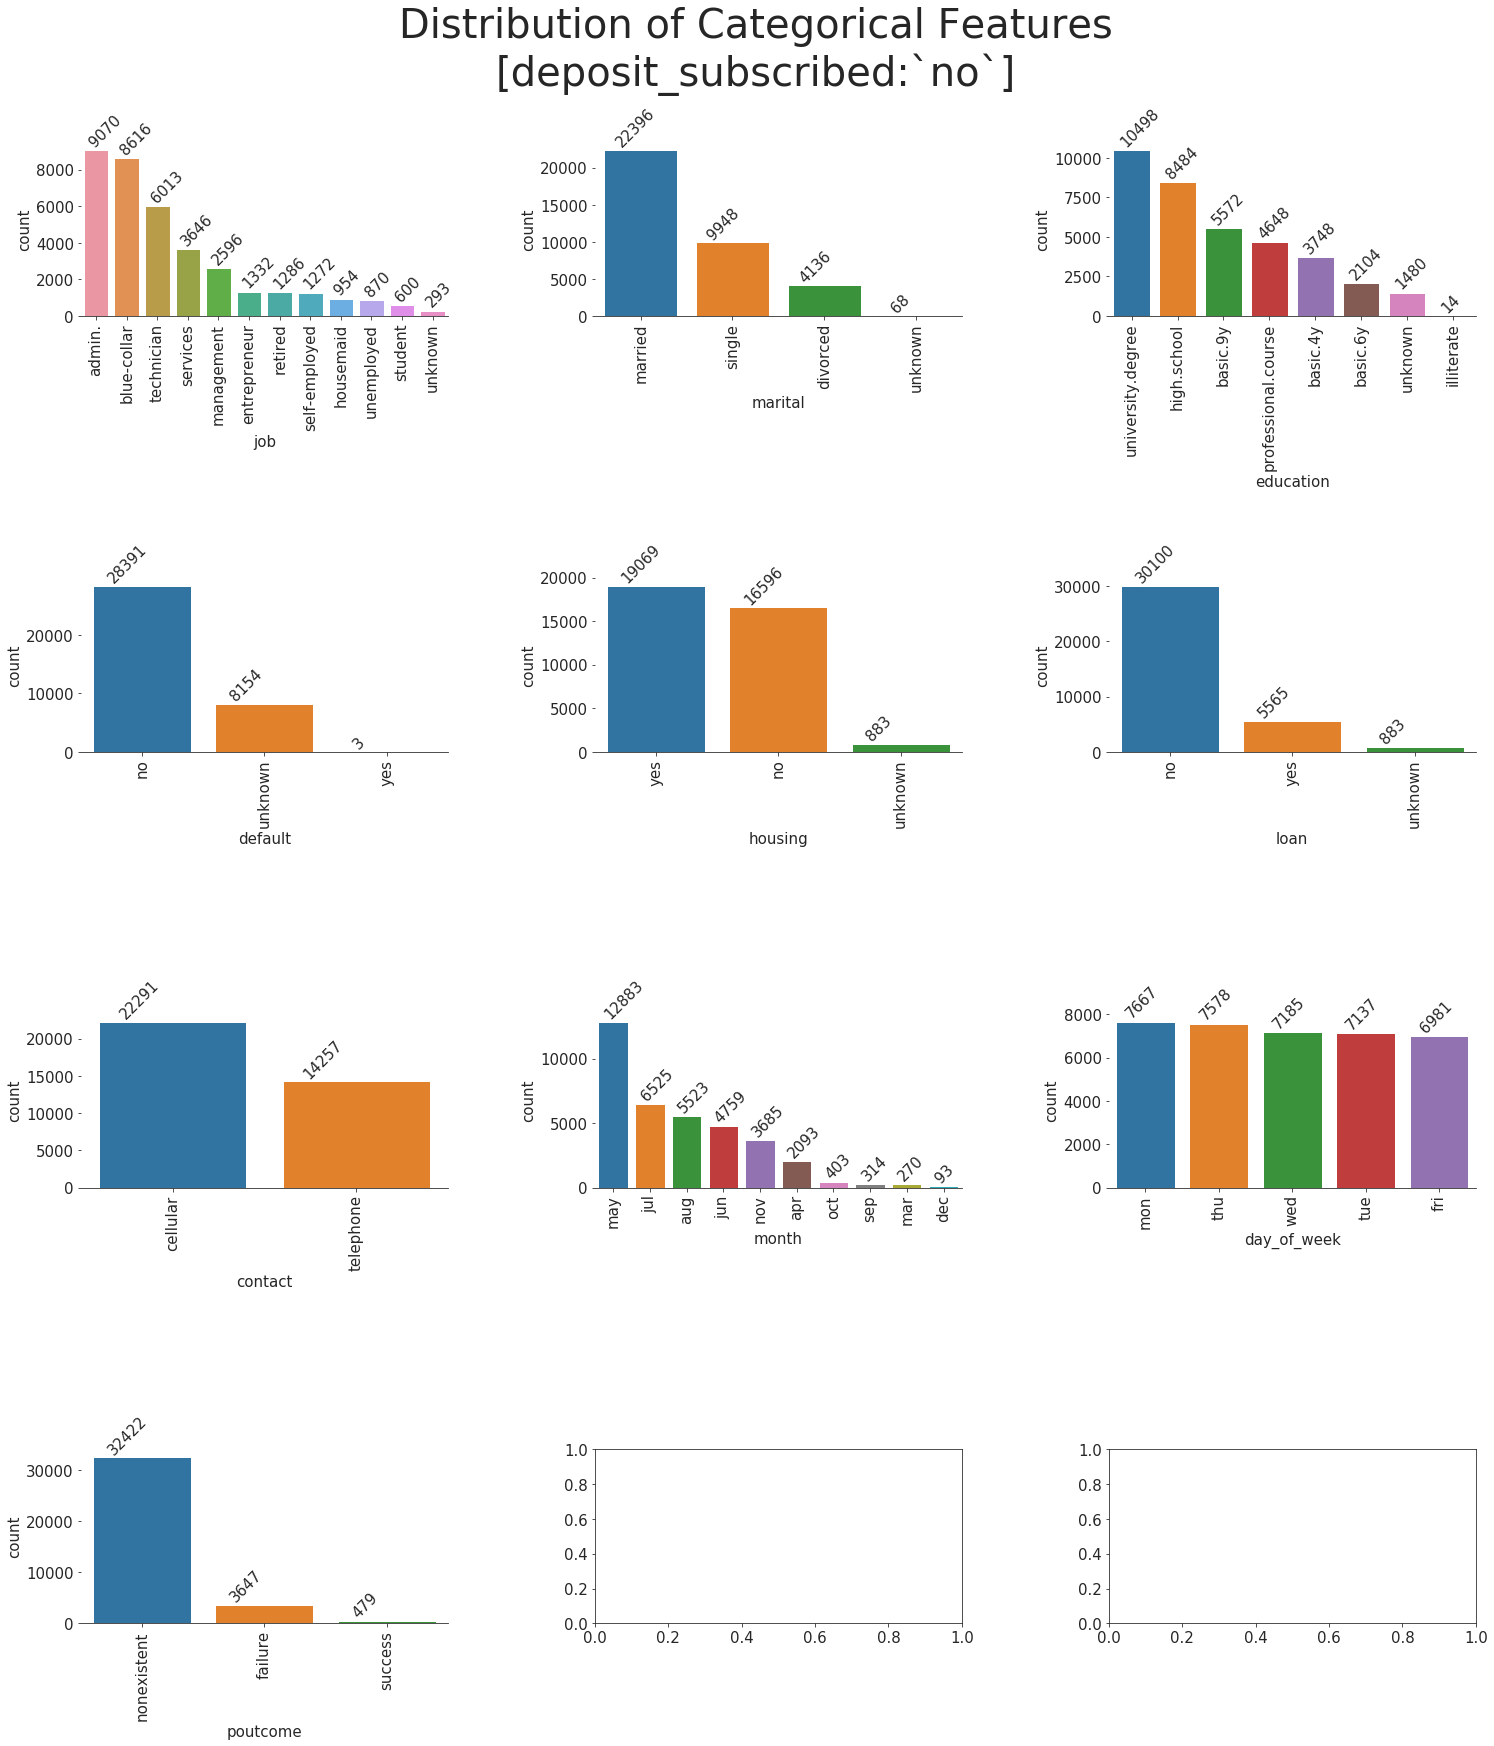

In [0]:
# https://stackoverflow.com/questions/19273040/rotating-axis-text-for-each-subplot
sns.set_style("ticks")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 21))
fig.suptitle(f"Distribution of Categorical Features\n[{target_column}:`no`]",
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)

plt.rcParams.update({'font.size': 15})
fig.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)

for ax, c in list(zip(axes.flat, categ_columns)):        
    sns.countplot(c, data=df_bank_trn[df_bank_trn[target_column]=='no'],                  
                  order= df_bank_trn[df_bank_trn[target_column]=='no'][c].value_counts().index,
                  ax=ax)
    for p in ax.patches:
        ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                       ha='left', va='bottom', rotation=45)
    ax.tick_params(labelrotation=90)  
    plt.sca(ax)
    plt.yticks(rotation=0)    
    # ax.axis('off')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    

In [0]:
widgets_list = []

for c in enumerate(categ_columns):
    widgets_list.append(widgets.Output())   
    

# render in output widgets
for c, wid in list(zip(categ_columns, widgets_list)):
    with wid:
        display.display(df_bank_h2o_trn[c].table().sort(['Count'], ascending=[False]))
    
# create VBox
hbox1 = widgets.HBox(widgets_list[:4])
hbox2 = widgets.HBox(widgets_list[4:])

In [0]:
hbox1

In [0]:
hbox2

### Find Unique Count `nunique` for Categorical Features

In [0]:
categ_uc = []
for c in categ_columns:    
    categ_uc.append([c, df_bank_h2o_all[c].unique().nrows])


In [0]:
h2o.H2OFrame(categ_uc, column_names=['Categ_Column', 'Count']).sort(['Count'], ascending=False)

Parse progress: |█████████████████████████████████████████████████████████| 100%


Categ_Column,Count
job,12
month,10
education,8
day_of_week,5
marital,4
default,3
housing,3
loan,3
poutcome,3
contact,2


### Find Numerical Features and their Distribution

In [0]:
# find which columns are numerical
num_columns = [df_bank_h2o_all.names[int(col_index)] 
               for col_index in df_bank_h2o_all.columns_by_type(coltype='numeric')]
h2o.H2OFrame([num_columns])

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed


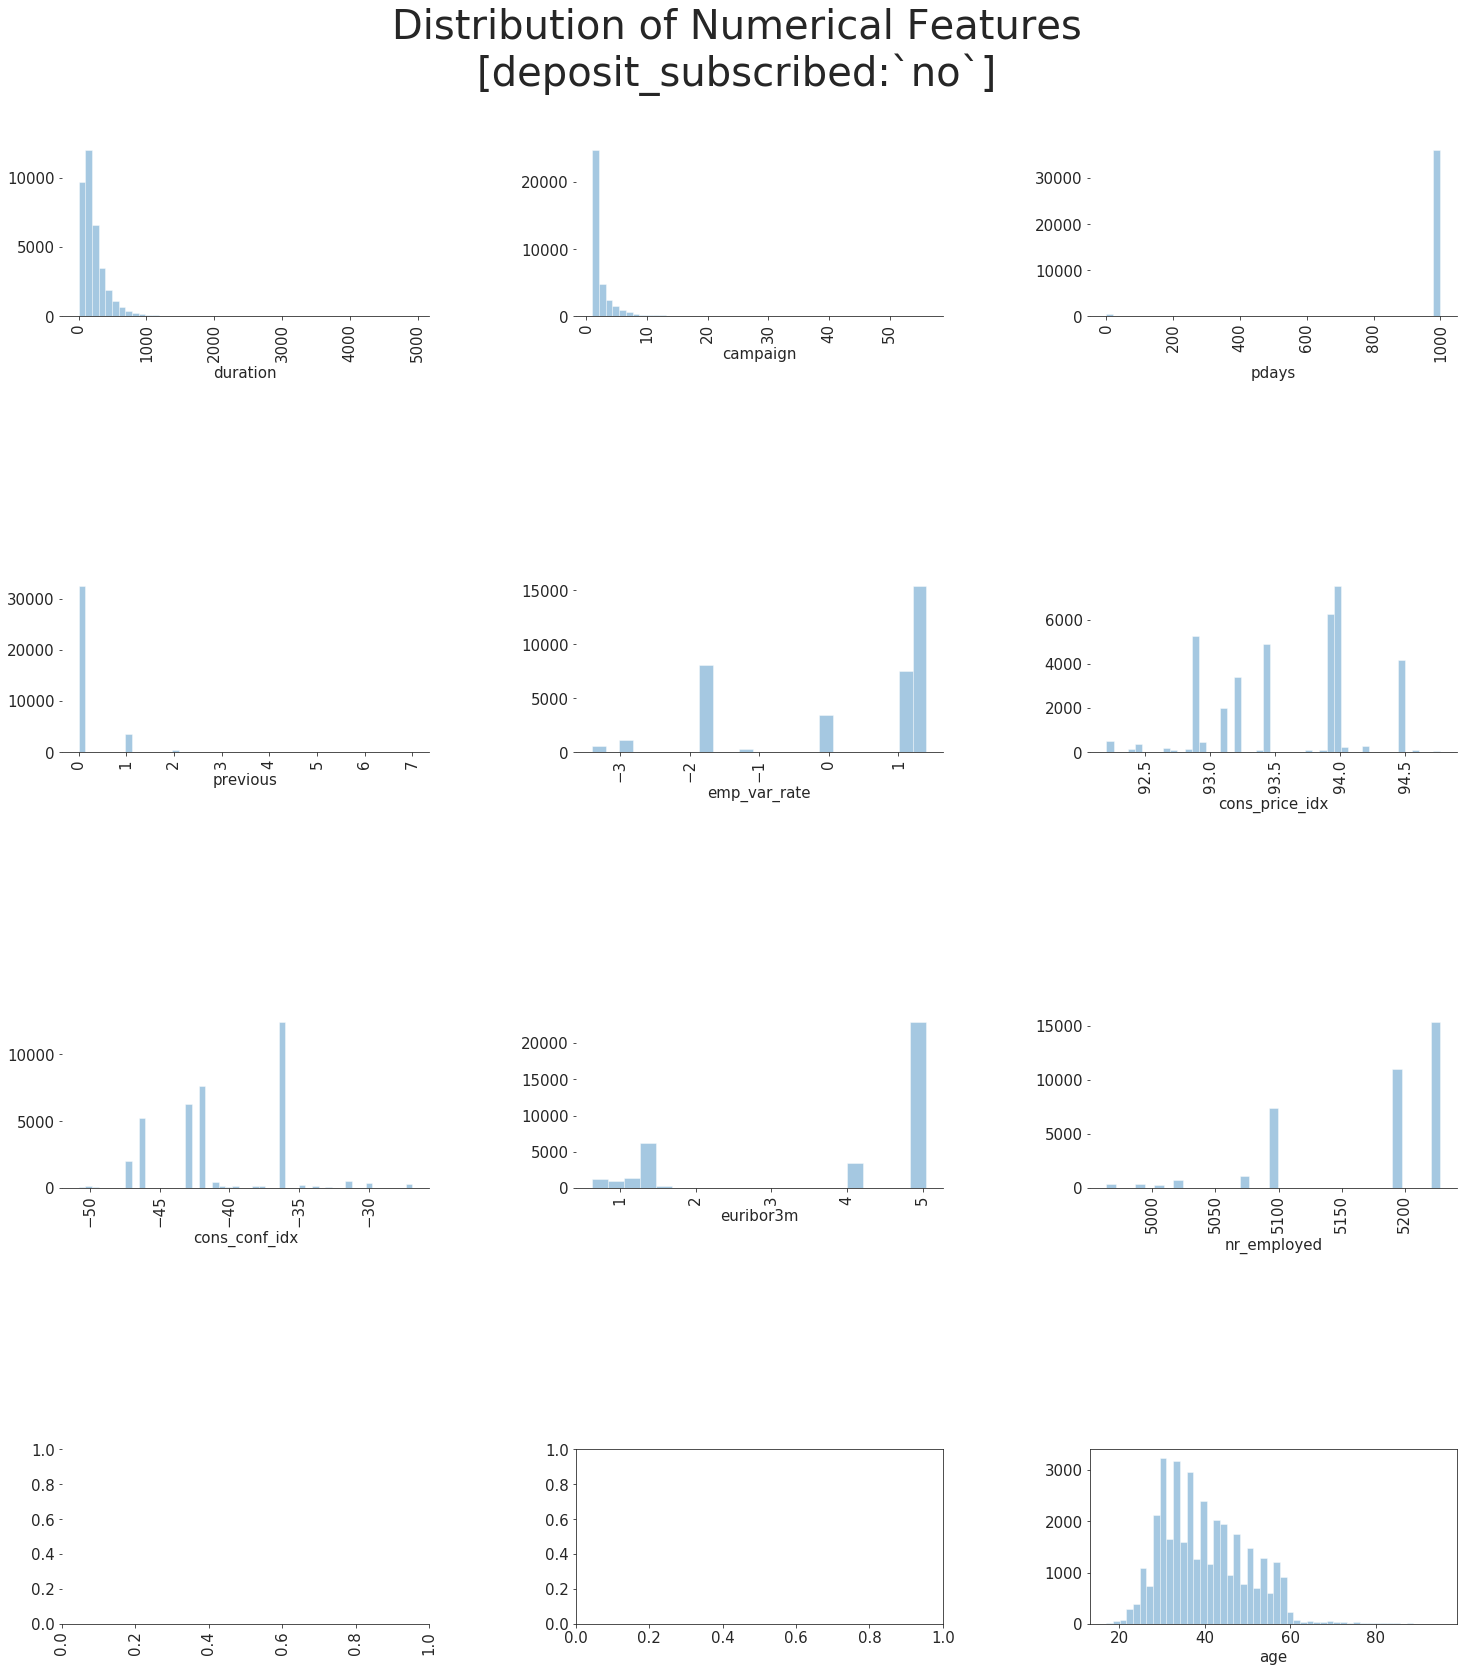

In [0]:
# https://stackoverflow.com/questions/19273040/rotating-axis-text-for-each-subplot
sns.set_style("ticks")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 21))
fig.suptitle(f"Distribution of Numerical Features\n[{target_column}:`no`]",
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)
plt.rcParams.update({'font.size': 15})
fig.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)

for ax, c in list(zip(axes.flat, num_columns)):        
    sns.distplot(a=df_bank_trn[df_bank_trn[target_column] == 'no'][c],
                  kde=False)
    
    ax.tick_params(labelrotation=90)  
    plt.sca(ax)
    plt.yticks(rotation=0)    
    # ax.axis('off')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)


### Correlation Matrix

In [0]:
df_corr = df_bank_h2o_trn[num_columns].cor(y=df_bank_h2o_trn[target_column], use='complete.obs')

In [0]:
df_corr['index'] = h2o.H2OFrame(num_columns)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
df_corr

deposit_subscribed,index
0.0303988,age
0.405274,duration
-0.0663574,campaign
-0.324914,pdays
0.230181,previous
-0.298334,emp_var_rate
-0.136211,cons_price_idx
0.0548779,cons_conf_idx
-0.307771,euribor3m
-0.354678,nr_employed


In [0]:
df_corr = df_bank_h2o_trn[num_columns].cor()
df_corr

age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
1,-0.000865705,0.00459358,-0.034369,0.0243647,-0.000370685,0.000856715,0.129372,0.0107674,-0.0177251
-0.000865705,1,-0.0716992,-0.047577,0.0206404,-0.0279679,0.00531227,-0.00817287,-0.0328967,-0.0447032
0.00459358,-0.0716992,1,0.0525836,-0.0791415,0.150754,0.127836,-0.0137331,0.135133,0.144095
-0.034369,-0.047577,0.0525836,1,-0.587514,0.271004,0.0788891,-0.0913424,0.296899,0.372605
0.0243647,0.0206404,-0.0791415,-0.587514,1,-0.420489,-0.20313,-0.0509364,-0.454494,-0.501333
-0.000370685,-0.0279679,0.150754,0.271004,-0.420489,1,0.775334,0.196041,0.972245,0.90697
0.000856715,0.00531227,0.127836,0.0788891,-0.20313,0.775334,1,0.0589862,0.68823,0.522034
0.129372,-0.00817287,-0.0137331,-0.0913424,-0.0509364,0.196041,0.0589862,1,0.277686,0.100513
0.0107674,-0.0328967,0.135133,0.296899,-0.454494,0.972245,0.68823,0.277686,1,0.945154
-0.0177251,-0.0447032,0.144095,0.372605,-0.501333,0.90697,0.522034,0.100513,0.945154,1


In [0]:
df_bank_trn.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


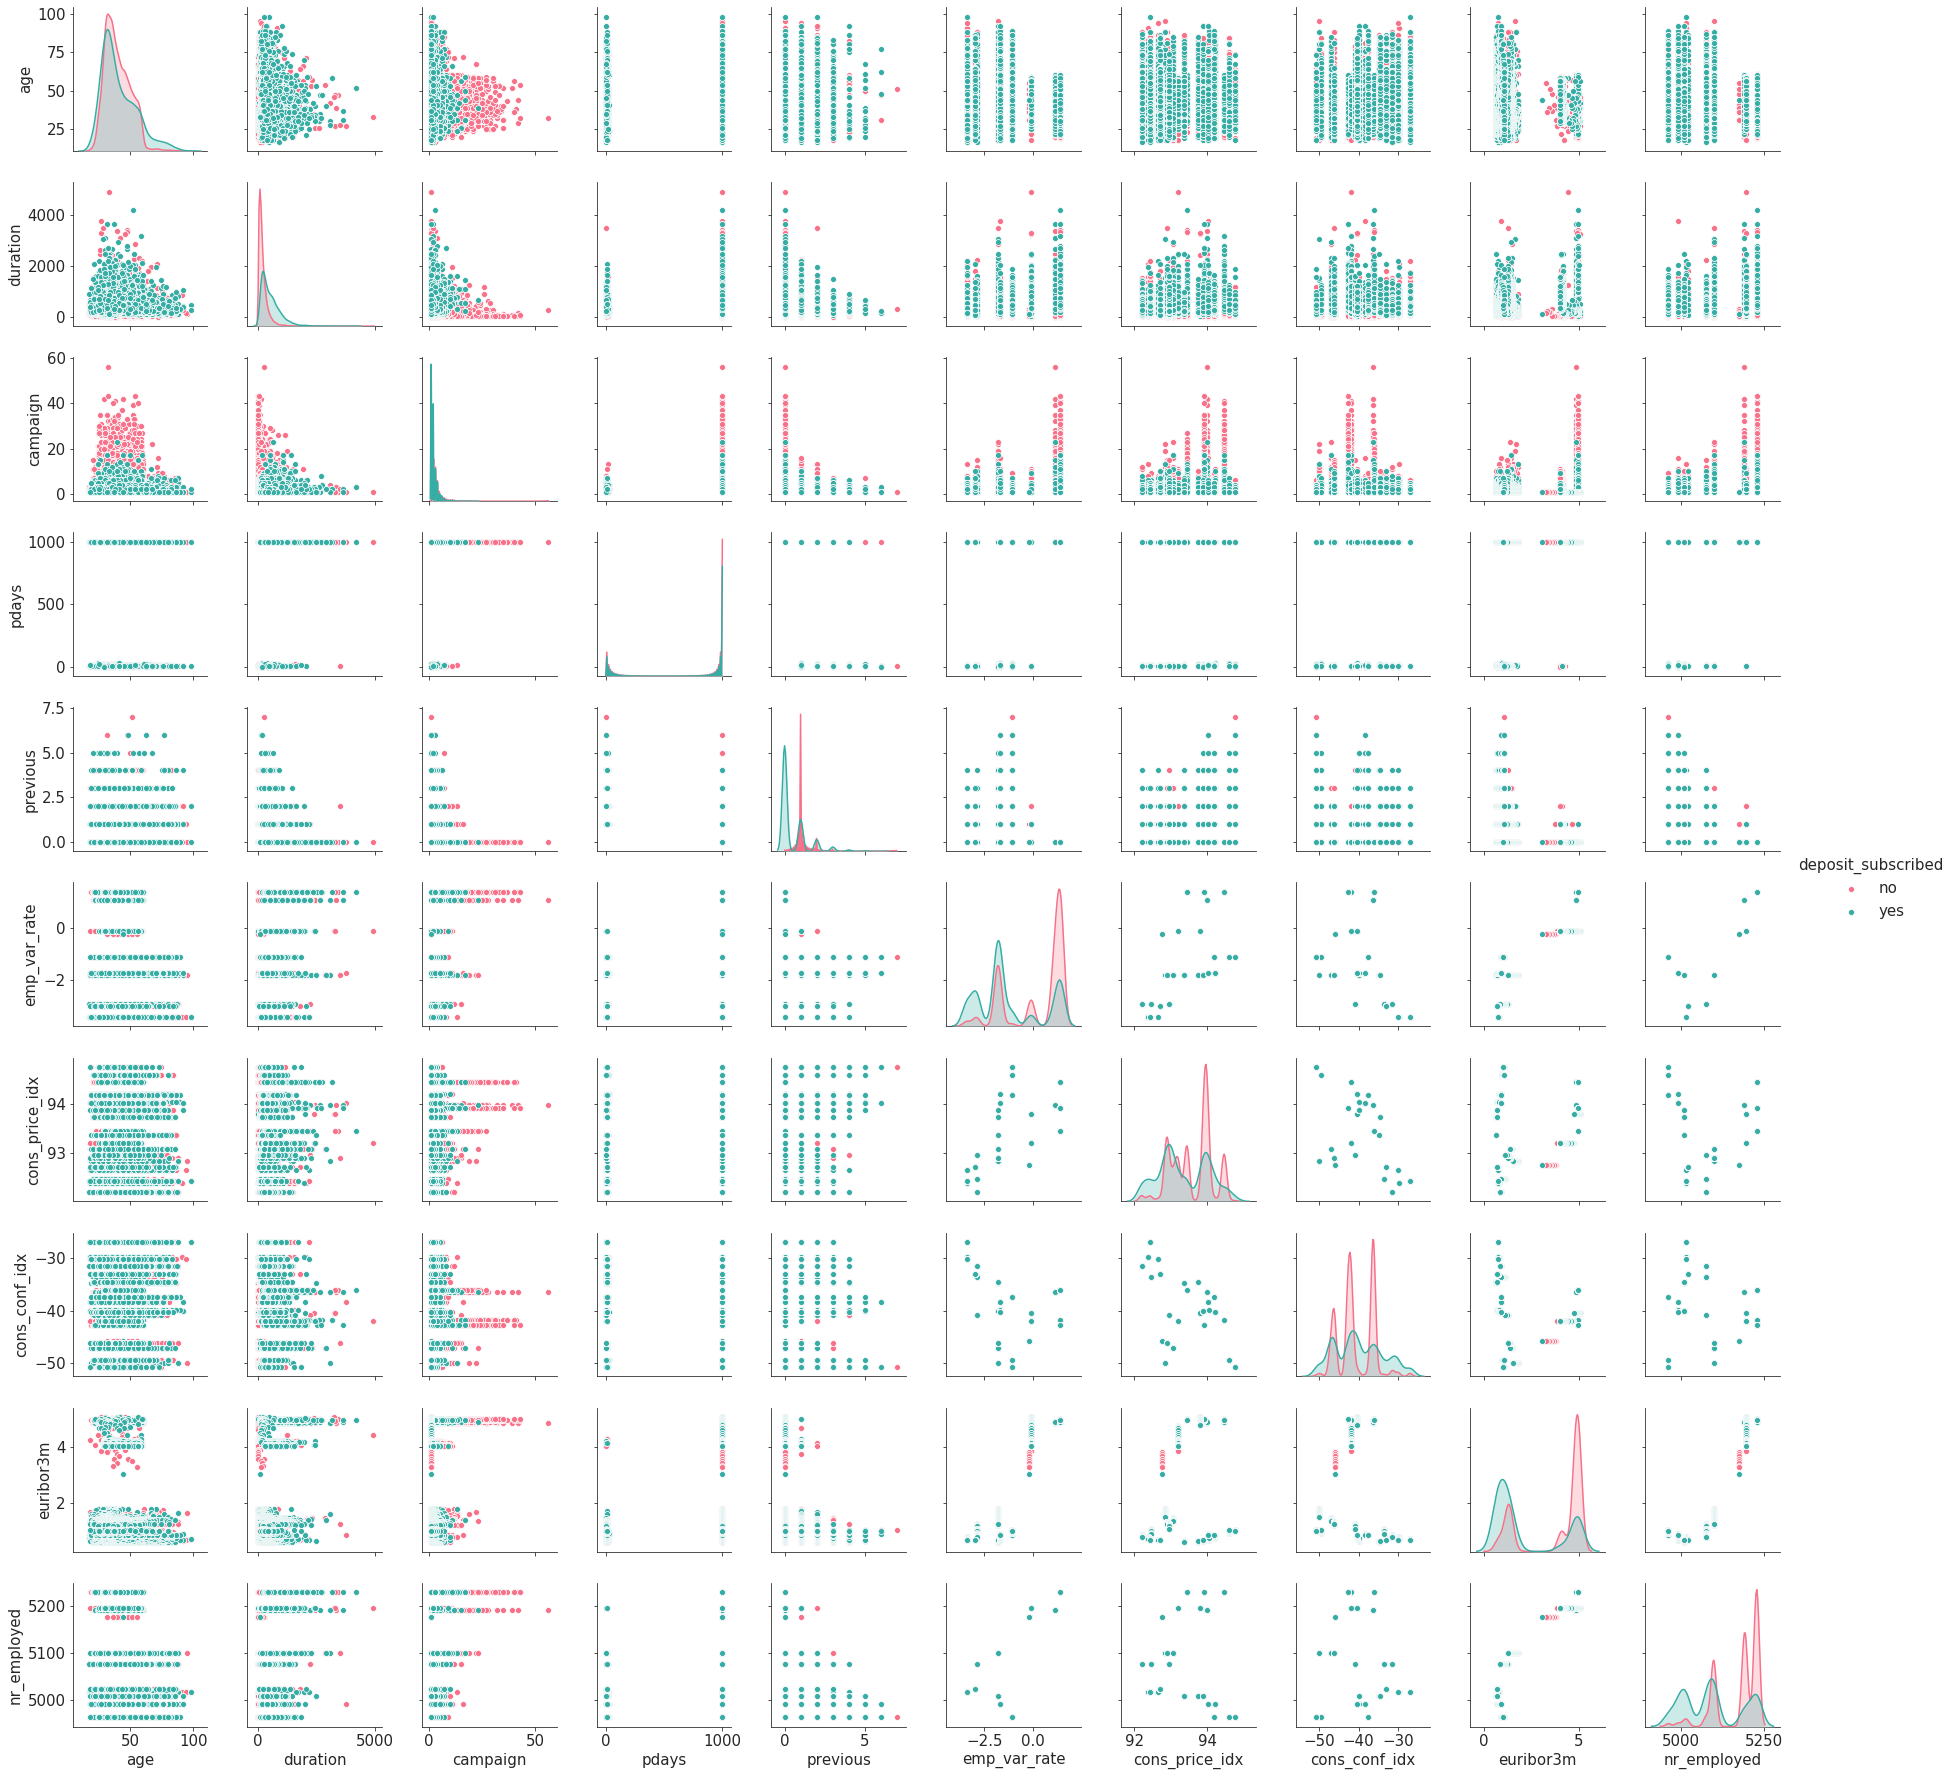

In [0]:
sns.pairplot(df_bank_trn, hue=target_column, palette="husl")

### Convert Categorical Features into Numerical
> http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/categorical_encoding.html

In [0]:
df_bank_h2o_all.head(2)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [0]:
print(categ_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


> **H2O will handle it internally.**

### Missing Value Imputation

In [0]:
# which Numerical columns contain misisng values
for c in num_columns:
    print(c, "=", df_bank_trn[c].isna().sum())

age = 0
duration = 0
campaign = 0
pdays = 0
previous = 0
emp_var_rate = 0
cons_price_idx = 0
cons_conf_idx = 0
euribor3m = 0
nr_employed = 0


In [0]:
# which categorical columns contain 'unknown'
missing_value_cols = []
for c in categ_columns:
    if 'unknown' in df_bank_h2o_trn[c].categories():
        missing_value_cols.append(c)

In [0]:
missing_value_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

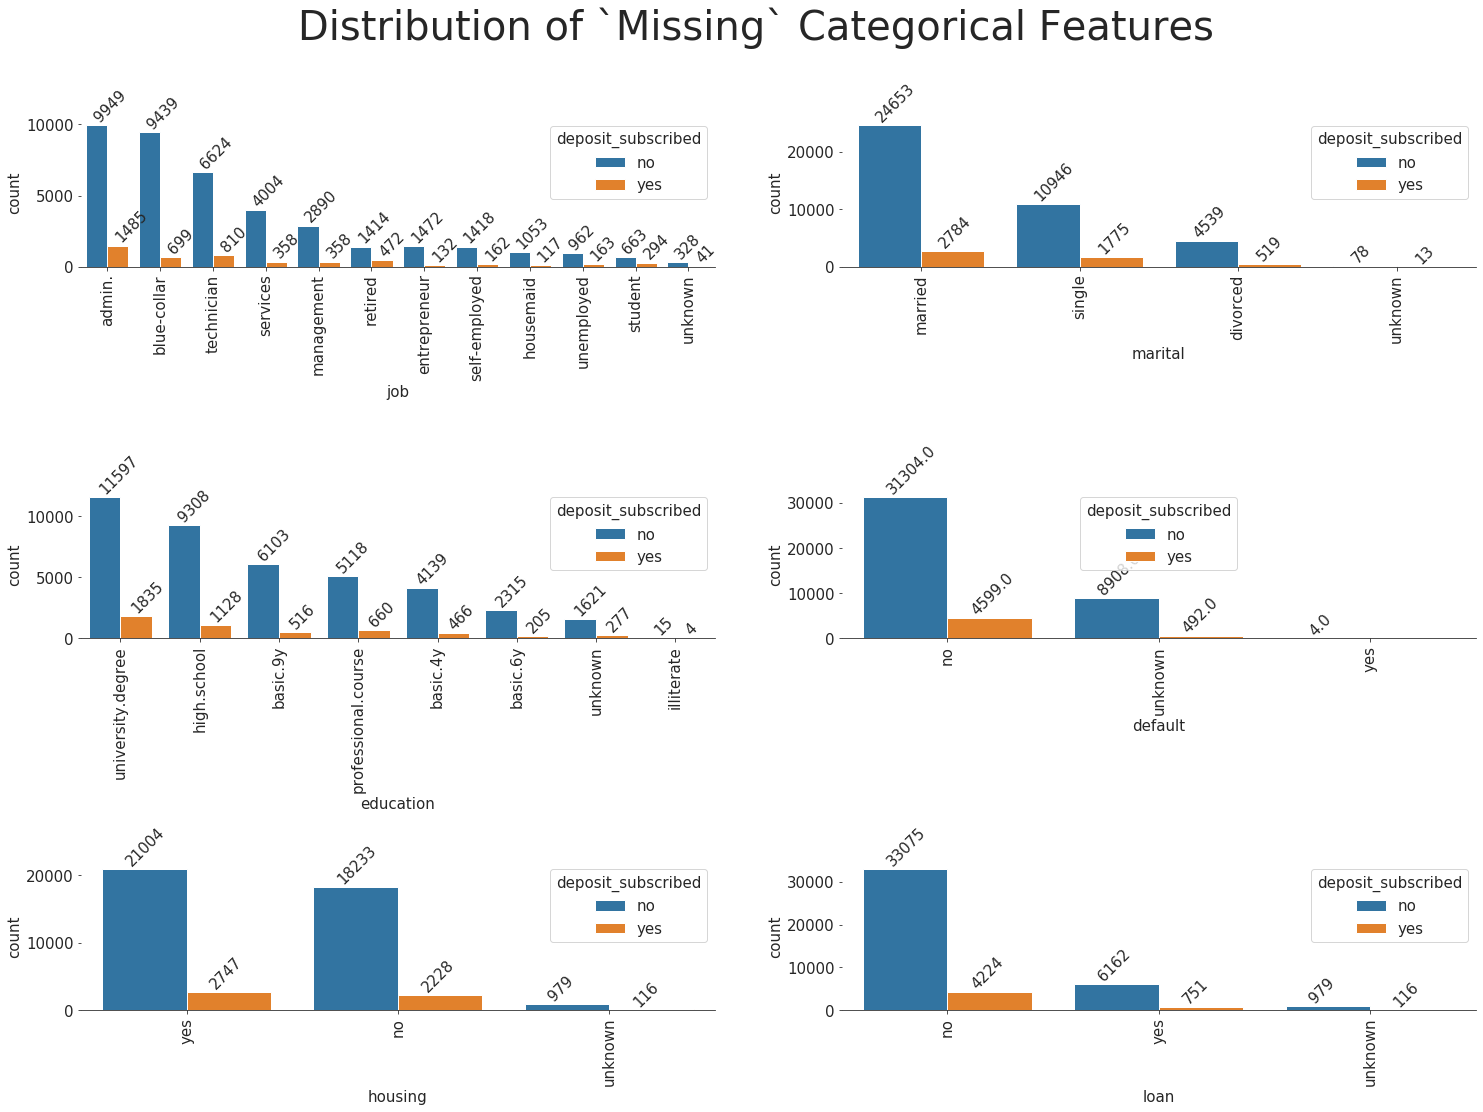

In [0]:
# https://stackoverflow.com/questions/19273040/rotating-axis-text-for-each-subplot
sns.set_style("ticks")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 21))
fig.suptitle("Distribution of `Missing` Categorical Features",
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)

plt.rcParams.update({'font.size': 15})
fig.subplots_adjust(top=0.99, bottom=0.4, hspace=1.5, wspace=0.2)

for ax, c in list(zip(axes.flat, missing_value_cols)):        
    sns.countplot(c, data=df_bank_all,                  
                  order= df_bank_all[c].value_counts().index,
                  hue=target_column,
                  ax=ax)
    for p in ax.patches:
        ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                       ha='left', va='bottom', rotation=45)
    ax.tick_params(labelrotation=90)  
    plt.sca(ax)
    plt.yticks(rotation=0)    
    # ax.axis('off')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    

In [0]:
# number of rows for which all the missing_value_cols have misisng values
from collections import Counter
conditions = ((df_bank_trn['job'] == 'unknown') & 
              (df_bank_trn['marital'] == 'unknown') & 
              (df_bank_trn['education'] == 'unknown') & 
              (df_bank_trn['default'] == 'unknown') &  
              (df_bank_trn['housing'] == 'unknown') & 
              (df_bank_trn['loan'] == 'unknown'))
df_bank_trn[conditions].__len__()

0

In [0]:
# The MissingIndicator transformer is useful to transform a
# dataset into corresponding binary matrix indicating the presence of missing values in the dataset.
from sklearn.impute import MissingIndicator

In [0]:
indicator = MissingIndicator(missing_values='unknown', features="all")

In [0]:
mask_all = indicator.fit_transform(df_bank_all[missing_value_cols])

In [0]:
mask_all.shape, len(missing_value_cols)

((45307, 6), 6)

In [0]:
new_cols = [mc+'_missing_status' for mc in missing_value_cols]
mask_all = pd.DataFrame(mask_all, columns=new_cols)

In [0]:
for nc in new_cols:
    mask_all[nc] = mask_all[nc].astype(int)

In [0]:
mask_all.shape, df_bank_all.shape

((45307, 6), (45307, 22))

In [0]:
df_bank_all.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed,is_test
45302,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,True
45303,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,True
45304,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,True
45305,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,True
45306,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no,True


In [0]:
df_bank_all1 = pd.concat([df_bank_all, mask_all], sort=False, axis=1).reset_index(drop=True)

In [0]:
df_bank_all1.shape

(45307, 28)

In [0]:
df_bank_all1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed,is_test,job_missing_status,marital_missing_status,education_missing_status,default_missing_status,housing_missing_status,loan_missing_status
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,0,0,0,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,0,0,0,0,0,0


In [0]:
# df_bank_trn1 = df_bank_all1[df_bank_all1['is_test'] == False].reset_index(drop=True)
# df_bank_tst1 = df_bank_all1[df_bank_all1['is_test'] == True].reset_index(drop=True)

In [0]:
df_bank_trn = df_bank_all[df_bank_all['is_test'] == False].reset_index(drop=True)
df_bank_tst = df_bank_all[df_bank_all['is_test'] == True].reset_index(drop=True)

In [0]:
df_bank_trn1.shape, df_bank_tst1.shape, df_bank_trn.shape, df_bank_tst.shape

((41188, 28), (4119, 28), (41188, 22), (4119, 22))

### Feature Normalization

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
%time scaler.fit(df_bank_trn[num_columns])

CPU times: user 330 ms, sys: 12.7 ms, total: 342 ms
Wall time: 15 ms


StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaler.mean_

array([ 4.00240604e+01,  2.58285010e+02,  2.56759250e+00,  9.62475454e+02,
        1.72962999e-01,  8.18855006e-02,  9.35756644e+01, -4.05026003e+01,
        3.62129081e+00,  5.16703591e+03])

In [0]:
df_bank_trn.loc[:, num_columns] = pd.DataFrame(scaler.transform(df_bank_trn[num_columns]), 
                                            columns=num_columns)

In [0]:
df_bank_tst.loc[:, num_columns] = pd.DataFrame(scaler.transform(df_bank_tst[num_columns]), 
                                                columns=num_columns)

In [0]:
df_bank_trn.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed,is_test
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.010471,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,False
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,-0.421501,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,False
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,-0.124520,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,False
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.413787,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,False
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,0.187888,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,False


In [0]:
df_bank_tst.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed,is_test
0,-0.961898,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,0.882129,-0.204909,0.195414,-0.349494,nonexistent,-1.197935,-1.179380,-1.231034,-1.330867,-0.940281,no,True
1,-0.098268,services,single,high.school,no,no,no,telephone,may,fri,0.338307,0.517118,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.711307,0.331680,no,True
2,-1.441693,services,married,high.school,no,yes,no,telephone,jun,wed,-0.120663,-0.565922,0.195414,-0.349494,nonexistent,0.839061,1.536429,-0.280328,0.772999,0.845170,no,True
3,-0.194227,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,-0.930610,0.156105,0.195414,-0.349494,nonexistent,0.839061,1.536429,-0.280328,0.771269,0.845170,no,True
4,0.669404,admin.,married,university.degree,no,yes,no,cellular,nov,mon,-0.772478,-0.565922,0.195414,-0.349494,nonexistent,-0.115781,-0.649003,-0.323542,0.328471,0.398115,no,True


In [0]:
df_bank_h2o_trn.describe()

Rows:41188
Cols:21




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,enum,real,real,real,real,real,enum
mins,17.0,,,,,,,,,,0.0,1.0,0.0,0.0,,-3.4,92.201,-50.8,0.634,4963.6,
mean,40.024060405943295,,,,,,,,,,258.28501019714514,2.5675925026706756,962.4754540157317,0.17296299893172737,,0.08188550063124972,93.57566436826235,-40.50260027192389,3.621290812858103,5167.035910944934,
maxs,98.0,,,,,,,,,,4918.0,56.0,999.0,7.0,,1.4,94.767,-26.9,5.045,5228.1,
sigma,10.42124998093405,,,,,,,,,,259.27924883646466,2.7700135429023334,186.91090734474128,0.4949010798392896,,1.5709597405170348,0.57884004895419,4.62819785617469,1.7344474048512566,72.25152766825613,
zeros,0,,,,,,,,,,4,0,15,35563,,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Drop Unnecessary Columns

In [0]:
df_bank_trn.drop(['is_test'], axis=1, inplace=True)
df_bank_tst.drop(['is_test'], axis=1, inplace=True)

In [0]:
set(['is_test']).intersection(set(df_bank_trn.columns)), \
set(['is_test']).intersection(set(df_bank_tst.columns))

(set(), set())

### Build the Model - GBM

In [0]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch

In [0]:
# df_bank_h2o_trn1 = h2o.H2OFrame(df_bank_trn1)
# df_bank_h2o_tst1 = h2o.H2OFrame(df_bank_tst1)

df_bank_h2o_trn = h2o.H2OFrame(df_bank_trn)
df_bank_h2o_tst = h2o.H2OFrame(df_bank_tst)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
# Identify predictors and response
x_cols = list(df_bank_trn.columns)
y_col = target_column
x_cols.remove(y_col)
print(x_cols)
print()
print(y_col)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

deposit_subscribed


In [0]:
nfolds = 5
gbm_hyper_params = {"ntrees": list(range(10, 251, 20)), 
                    "max_depth": list(range(3, 16)),
                    "min_rows": [2, 3, 4, 5, 6, 7, 8],
                    "learn_rate": [0.1, 0.01, 0.001, 0.0001],
                    "sample_rate": [0.5, 0.6, 0.7, 0.8, 0.9],
                    "col_sample_rate": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    "balance_classes": [True, False]
                    }

gbm_search_criteria = {"strategy": "RandomDiscrete", "max_models": 40, 
                       "seed": 42}

In [0]:
gbm = H2OGradientBoostingEstimator(distribution="bernoulli",
                                   nfolds=nfolds,
                                   fold_assignment="Stratified",
                                   keep_cross_validation_predictions=True,
                                   categorical_encoding='auto',
                                   seed=42)

In [0]:
gbm_grid = H2OGridSearch(model=gbm,
                         hyper_params=gbm_hyper_params,
                         search_criteria=gbm_search_criteria,
                         grid_id="gbm_grid_binomial7")

### Train the Model

In [0]:
%time gbm_grid.train(x=x_cols, y=y_col, training_frame=df_bank_h2o_trn)##########

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 4.87 s, sys: 723 ms, total: 5.6 s
Wall time: 16min 27s


In [0]:
gbm_grid_f1 = gbm_grid.get_grid(sort_by = "F1",
                                decreasing = True)

In [0]:
# F1 score of cross-validated model
gbm_grid_f1.show()

     balance_classes col_sample_rate learn_rate max_depth min_rows ntrees sample_rate                    model_ids                   f1
0              false             0.6       0.01         8      8.0    170         0.6  gbm_grid_binomial7_model_11   0.6558912664156488
1              false             0.9       0.01         6      7.0    250         0.8  gbm_grid_binomial7_model_37   0.6557679874388105
2              false             0.9       0.01         8      8.0     50         0.7  gbm_grid_binomial7_model_26   0.6547002220577349
3              false             0.5       0.01        11      8.0    110         0.8  gbm_grid_binomial7_model_22   0.6536357930601631
4              false             0.6      0.001         9      2.0    150         0.7  gbm_grid_binomial7_model_12   0.6534247795493008
5              false             0.5      0.001         9      7.0     90         0.5  gbm_grid_binomial7_model_13     0.65335028145996
6              false             0.6      0.001 

In [0]:
gbm_grid_auc = gbm_grid.get_grid(sort_by = "auc",
                                decreasing = True)

### Save the Model

In [0]:
# save the model
for i in range(len(gbm_grid_auc.models)):
    model_path = h2o.save_model(model=gbm_grid_auc.models[i], 
                                path="./saved_models/WNS/GBM_29Aug/",
                                force=True)
    print(model_path)

NameError: name 'gbm_grid_auc' is not defined

In [0]:
!ls ./saved_models/WNS/GBM/

### Load the Model

In [0]:
# load the model
saved_model = h2o.load_model(model_path)

### Train with Stacked Ensemble Approach

In [0]:
# H2OTypeError: Argument `base_models` should be a ?list(string),
# got list [[, ], [, ]]

base_models = []
base_models.extend(gbm_grid_f1.models[:5])

In [0]:
len(base_models)

5

In [0]:
# Train a stacked ensemble using the GBM and GLM above
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomial",
                                       base_models=base_models                                      
                                      )

In [0]:
%time ensemble.train(x=x_cols, y=y_col, training_frame=df_bank_h2o_trn)

H2OResponseError: ModelBuilderErrorV3  (water.exceptions.H2OModelBuilderIllegalArgumentException):
    timestamp = 1568110524624
    error_url = '/99/ModelBuilders/stackedensemble'
    msg = 'Illegal argument(s) for StackedEnsemble model: my_ensemble_binomial.  Details: ERRR on field: _train: Missing training frame: Key_Frame__upload_8a0ac170086abcefd300c248f59d42d2.hex'
    dev_msg = 'Illegal argument(s) for StackedEnsemble model: my_ensemble_binomial.  Details: ERRR on field: _train: Missing training frame: Key_Frame__upload_8a0ac170086abcefd300c248f59d42d2.hex'
    http_status = 412
    values = {'messages': [{'_log_level': 1, '_field_name': '_train', '_message': 'Missing training frame: Key_Frame__upload_8a0ac170086abcefd300c248f59d42d2.hex'}], 'algo': 'StackedEnsemble', 'parameters': {'_train': {'name': 'Key_Frame__upload_8a0ac170086abcefd300c248f59d42d2.hex', 'type': 'Key'}, '_valid': None, '_nfolds': 0, '_keep_cross_validation_models': True, '_keep_cross_validation_predictions': False, '_keep_cross_validation_fold_assignment': False, '_parallelize_cross_validation': True, '_auto_rebalance': True, '_seed': -1, '_fold_assignment': 'AUTO', '_categorical_encoding': 'AUTO', '_max_categorical_levels': 10, '_distribution': 'AUTO', '_tweedie_power': 1.5, '_quantile_alpha': 0.5, '_huber_alpha': 0.9, '_ignored_columns': None, '_ignore_const_cols': True, '_weights_column': None, '_offset_column': None, '_fold_column': None, '_check_constant_response': True, '_is_cv_model': False, '_score_each_iteration': False, '_max_runtime_secs': 0.0, '_stopping_rounds': 0, '_stopping_metric': 'AUTO', '_stopping_tolerance': 0.001, '_response_column': 'deposit_subscribed', '_balance_classes': False, '_max_after_balance_size': 5.0, '_class_sampling_factors': None, '_max_confusion_matrix_size': 20, '_checkpoint': None, '_pretrained_autoencoder': None, '_custom_metric_func': None, '_custom_distribution_func': None, '_export_checkpoints_dir': None, '_base_models': [{'name': 'gbm_grid_binomial2_model_11', 'type': 'Key'}, {'name': 'gbm_grid_binomial2_model_51', 'type': 'Key'}, {'name': 'gbm_grid_binomial2_model_8', 'type': 'Key'}, {'name': 'gbm_grid_binomial2_model_37', 'type': 'Key'}, {'name': 'gbm_grid_binomial2_model_62', 'type': 'Key'}], '_keep_levelone_frame': False, '_keep_base_model_predictions': False, '_metalearner_nfolds': 0, '_metalearner_fold_assignment': None, '_metalearner_fold_column': None, '_blending': None, '_metalearner_algorithm': 'AUTO', '_metalearner_params': '', '_metalearner_parameters': None}, 'error_count': 2}
    exception_msg = 'Illegal argument(s) for StackedEnsemble model: my_ensemble_binomial.  Details: ERRR on field: _train: Missing training frame: Key_Frame__upload_8a0ac170086abcefd300c248f59d42d2.hex'
    stacktrace =
        water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for StackedEnsemble model: my_ensemble_binomial.  Details: ERRR on field: _train: Missing training frame: Key_Frame__upload_8a0ac170086abcefd300c248f59d42d2.hex
        water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:20)
        hex.ModelBuilder.trainModelOnH2ONode(ModelBuilder.java:272)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:64)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:17)
        water.api.RequestServer.serve(RequestServer.java:462)
        water.api.RequestServer.doGeneric(RequestServer.java:295)
        water.api.RequestServer.doPost(RequestServer.java:221)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:755)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:848)
        org.eclipse.jetty.servlet.ServletHolder.handle(ServletHolder.java:684)
        org.eclipse.jetty.servlet.ServletHandler.doHandle(ServletHandler.java:501)
        org.eclipse.jetty.server.handler.ContextHandler.doHandle(ContextHandler.java:1086)
        org.eclipse.jetty.servlet.ServletHandler.doScope(ServletHandler.java:427)
        org.eclipse.jetty.server.handler.ContextHandler.doScope(ContextHandler.java:1020)
        org.eclipse.jetty.server.handler.ScopedHandler.handle(ScopedHandler.java:135)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:154)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:116)
        water.webserver.jetty8.Jetty8ServerAdapter$LoginHandler.handle(Jetty8ServerAdapter.java:119)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:154)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:116)
        org.eclipse.jetty.server.Server.handle(Server.java:370)
        org.eclipse.jetty.server.AbstractHttpConnection.handleRequest(AbstractHttpConnection.java:494)
        org.eclipse.jetty.server.BlockingHttpConnection.handleRequest(BlockingHttpConnection.java:53)
        org.eclipse.jetty.server.AbstractHttpConnection.content(AbstractHttpConnection.java:984)
        org.eclipse.jetty.server.AbstractHttpConnection$RequestHandler.content(AbstractHttpConnection.java:1045)
        org.eclipse.jetty.http.HttpParser.parseNext(HttpParser.java:861)
        org.eclipse.jetty.http.HttpParser.parseAvailable(HttpParser.java:236)
        org.eclipse.jetty.server.BlockingHttpConnection.handle(BlockingHttpConnection.java:72)
        org.eclipse.jetty.server.bio.SocketConnector$ConnectorEndPoint.run(SocketConnector.java:264)
        org.eclipse.jetty.util.thread.QueuedThreadPool.runJob(QueuedThreadPool.java:608)
        org.eclipse.jetty.util.thread.QueuedThreadPool$3.run(QueuedThreadPool.java:543)
        java.lang.Thread.run(Thread.java:745)
    parameters = {'__meta': {'schema_version': 99, 'schema_name': 'StackedEnsembleParametersV99', 'schema_type': 'StackedEnsembleParameters'}, 'model_id': None, 'training_frame': None, 'validation_frame': None, 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'parallelize_cross_validation': True, 'distribution': 'AUTO', 'tweedie_power': 1.5, 'quantile_alpha': 0.5, 'huber_alpha': 0.9, 'response_column': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'deposit_subscribed', 'is_member_of_frames': None}, 'weights_column': None, 'offset_column': None, 'fold_column': None, 'fold_assignment': 'AUTO', 'categorical_encoding': 'AUTO', 'max_categorical_levels': 10, 'ignored_columns': None, 'ignore_const_cols': True, 'score_each_iteration': False, 'checkpoint': None, 'stopping_rounds': 0, 'max_runtime_secs': 0.0, 'stopping_metric': 'AUTO', 'stopping_tolerance': 0.001, 'custom_metric_func': None, 'custom_distribution_func': None, 'export_checkpoints_dir': None, 'base_models': [{'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_binomial2_model_11', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_binomial2_model_11'}, {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_binomial2_model_51', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_binomial2_model_51'}, {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_binomial2_model_8', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_binomial2_model_8'}, {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_binomial2_model_37', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_binomial2_model_37'}, {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_binomial2_model_62', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_binomial2_model_62'}], 'metalearner_algorithm': 'AUTO', 'metalearner_nfolds': 0, 'metalearner_fold_assignment': None, 'metalearner_fold_column': None, 'keep_levelone_frame': False, 'metalearner_params': '', 'blending_frame': None, 'seed': -1}
    messages = [{'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'train', 'message': 'Missing training frame: Key_Frame__upload_8a0ac170086abcefd300c248f59d42d2.hex'}]
    error_count = 2


### Evaluation

In [0]:
# F1 of training data
pd.DataFrame(gbm_grid_f1.F1(train=True))

,gbm_grid_binomial7_model_11,gbm_grid_binomial7_model_37,gbm_grid_binomial7_model_26,gbm_grid_binomial7_model_22,gbm_grid_binomial7_model_12,gbm_grid_binomial7_model_13,gbm_grid_binomial7_model_9,gbm_grid_binomial7_model_16,gbm_grid_binomial7_model_21,gbm_grid_binomial7_model_33,gbm_grid_binomial7_model_8,gbm_grid_binomial7_model_7,gbm_grid_binomial7_model_19,gbm_grid_binomial7_model_3,gbm_grid_binomial7_model_31,gbm_grid_binomial7_model_38,gbm_grid_binomial7_model_25,gbm_grid_binomial7_model_20,gbm_grid_binomial7_model_4,gbm_grid_binomial7_model_28,gbm_grid_binomial7_model_2,gbm_grid_binomial7_model_35,gbm_grid_binomial7_model_39,gbm_grid_binomial7_model_27,gbm_grid_binomial7_model_5,gbm_grid_binomial7_model_10,gbm_grid_binomial7_model_23,gbm_grid_binomial7_model_40,gbm_grid_binomial7_model_18,gbm_grid_binomial7_model_15,gbm_grid_binomial7_model_6,gbm_grid_binomial7_model_34,gbm_grid_binomial7_model_29,gbm_grid_binomial7_model_17,gbm_grid_binomial7_model_30,gbm_grid_binomial7_model_1,gbm_grid_binomial7_model_24,gbm_grid_binomial7_model_36,gbm_grid_binomial7_model_32,gbm_grid_binomial7_model_14
0,"[0.35075624120880877, 0.7335519573683132]","[0.31355425612983817, 0.6919743782969103]","[0.22657577075206184, 0.7172328851483115]","[0.33155218670689784, 0.8269648284845853]","[0.1566663670903182, 0.7464155788572652]","[0.13483930466990834, 0.7101009111394141]","[0.16327705252913008, 0.7490514905149052]","[0.16240545064346898, 0.8392210144927537]","[0.1668820241154064, 0.862679211469534]","[0.19025779736189694, 0.8757687576875769]","[0.3066862638869315, 0.8243096325288107]","[0.13674498250642475, 0.9283252109830025]","[0.14248152557073038, 0.6858856534777982]","[0.43890598187243013, 0.7820219828055284]","[0.1814121400518202, 0.7214223385689356]","[0.11927533910065492, 0.8547368421052631]","[0.240245645883562, 0.9555337047962417]","[0.3452716766097149, 0.6523638481700805]","[0.12043653013098916, 0.9132551449435716]","[0.4542521815069189, 0.8684967899048041]","[0.1146307108948321, 0.9070238690491855]","[0.11376797427198129, 0.9251889962200756]","[0.41403239194085634, 0.9453064817871685]","[0.11181327996189286, 0.899713690786049]","[0.13659427572318317, 0.9374660285558987]","[0.11100932428956208, 0.8990363613002699]","[0.11646928171000313, 0.9279115673114884]","[0.12367489739241462, 0.644145433724592]","[0.3621644078595788, 0.9975202156334232]","[0.39230993676000725, 0.968092033861515]","[0.3829438525659208, 0.999534450651769]","[0.11884170280644042, 0.9795451138578106]","[0.1153863073303739, 0.763897564022486]","[0.11502049618469545, 0.6645898234683282]","[0.11318036834418016, 0.8908108954289293]","[0.11578900940585556, 0.891119691119691]","[0.11510047314948728, 0.8803784107789737]","[0.10608083305501667, 0.8754614970651916]","[0.11232060976515616, 0.8896946175058728]","[0.11253956071765557, 0.8899970665884424]"


In [0]:
# F1 of cross-validated holdout predictions
pd.DataFrame(gbm_grid_f1.F1(xval=True))

,gbm_grid_binomial7_model_11,gbm_grid_binomial7_model_37,gbm_grid_binomial7_model_26,gbm_grid_binomial7_model_22,gbm_grid_binomial7_model_12,gbm_grid_binomial7_model_13,gbm_grid_binomial7_model_9,gbm_grid_binomial7_model_16,gbm_grid_binomial7_model_21,gbm_grid_binomial7_model_33,gbm_grid_binomial7_model_8,gbm_grid_binomial7_model_7,gbm_grid_binomial7_model_19,gbm_grid_binomial7_model_3,gbm_grid_binomial7_model_31,gbm_grid_binomial7_model_38,gbm_grid_binomial7_model_25,gbm_grid_binomial7_model_20,gbm_grid_binomial7_model_4,gbm_grid_binomial7_model_28,gbm_grid_binomial7_model_2,gbm_grid_binomial7_model_35,gbm_grid_binomial7_model_39,gbm_grid_binomial7_model_27,gbm_grid_binomial7_model_5,gbm_grid_binomial7_model_10,gbm_grid_binomial7_model_23,gbm_grid_binomial7_model_40,gbm_grid_binomial7_model_18,gbm_grid_binomial7_model_15,gbm_grid_binomial7_model_6,gbm_grid_binomial7_model_34,gbm_grid_binomial7_model_29,gbm_grid_binomial7_model_17,gbm_grid_binomial7_model_30,gbm_grid_binomial7_model_1,gbm_grid_binomial7_model_24,gbm_grid_binomial7_model_36,gbm_grid_binomial7_model_32,gbm_grid_binomial7_model_14
0,"[0.2708119638992273, 0.6558912664156488]","[0.29455223638521416, 0.6557679874388105]","[0.19082541376605644, 0.6547002220577349]","[0.22029657346651557, 0.6536357930601631]","[0.13678810787913137, 0.6534247795493008]","[0.12936565723856944, 0.65335028145996]","[0.14008234235794018, 0.6532618409294012]","[0.1391342581851974, 0.6521383819122855]","[0.14598494691375435, 0.651070653711914]","[0.1494569909189938, 0.6508717031738936]","[0.22277965036948522, 0.6505891016200295]","[0.22548947167487254, 0.6505122494432072]","[0.1362473050126141, 0.6489653909540377]","[0.30571577526739796, 0.6488606649234218]","[0.1487816721579282, 0.648108108108108]","[0.11647867100933235, 0.646672743846855]","[0.168668396880387, 0.645679235071261]","[0.2737581011310184, 0.645592485549133]","[0.11687894227625481, 0.6452075674706358]","[0.2650872923903428, 0.6450161928751349]","[0.13315859426579718, 0.6426107226107227]","[0.11807268872145257, 0.6414339162968763]","[0.2147788940499999, 0.6403330085909131]","[0.14699107311022874, 0.6401518747033698]","[0.19859728698306062, 0.6399443526649857]","[0.12280082652214591, 0.638871303246812]","[0.13648032152097828, 0.6373892773892774]","[0.12330943316911212, 0.6362690379339704]","[0.1993545495004935, 0.6354051054384019]","[0.2033282931442086, 0.6337676244868822]","[0.0645995669015717, 0.6325285677463699]","[0.1139151060090207, 0.6319625195210828]","[0.11440429607251362, 0.6295299605310368]","[0.11476637662458708, 0.6284316390323457]","[0.11693931148370133, 0.6257449344457686]","[0.11421772108533032, 0.6190894709087713]","[0.13450786123226488, 0.6041684535551934]","[0.12674434876473692, 0.588007136762082]","[0.11258896372304356, 0.5403624382207578]","[0.11362410896421887, 0.37169146881744863]"


In [0]:
# Precision of cross-validated holdout predictions
pd.DataFrame(gbm_grid_f1.precision(xval=True))

,gbm_grid_binomial7_model_11,gbm_grid_binomial7_model_37,gbm_grid_binomial7_model_26,gbm_grid_binomial7_model_22,gbm_grid_binomial7_model_12,gbm_grid_binomial7_model_13,gbm_grid_binomial7_model_9,gbm_grid_binomial7_model_16,gbm_grid_binomial7_model_21,gbm_grid_binomial7_model_33,gbm_grid_binomial7_model_8,gbm_grid_binomial7_model_7,gbm_grid_binomial7_model_19,gbm_grid_binomial7_model_3,gbm_grid_binomial7_model_31,gbm_grid_binomial7_model_38,gbm_grid_binomial7_model_25,gbm_grid_binomial7_model_20,gbm_grid_binomial7_model_4,gbm_grid_binomial7_model_28,gbm_grid_binomial7_model_2,gbm_grid_binomial7_model_35,gbm_grid_binomial7_model_39,gbm_grid_binomial7_model_27,gbm_grid_binomial7_model_5,gbm_grid_binomial7_model_10,gbm_grid_binomial7_model_23,gbm_grid_binomial7_model_40,gbm_grid_binomial7_model_18,gbm_grid_binomial7_model_15,gbm_grid_binomial7_model_6,gbm_grid_binomial7_model_34,gbm_grid_binomial7_model_29,gbm_grid_binomial7_model_17,gbm_grid_binomial7_model_30,gbm_grid_binomial7_model_1,gbm_grid_binomial7_model_24,gbm_grid_binomial7_model_36,gbm_grid_binomial7_model_32,gbm_grid_binomial7_model_14
0,"[0.8107910565098186, 1.0]","[0.8672512374971714, 1.0]","[0.46974542204846037, 1.0]","[0.7162783304351782, 1.0]","[0.21673597943336464, 0.8365650969529086]","[0.1882084029414721, 1.0]","[0.24611447590204497, 0.8421052631578947]","[0.23804529241776531, 1.0]","[0.2531446155384208, 1.0]","[0.30744717214953693, 0.9090909090909091]","[0.6432754386464445, 1.0]","[0.6140268646870697, 1.0]","[0.20196026815371027, 0.836405529953917]","[0.9654625646050872, 0.9230769230769231]","[0.29721568619399263, 1.0]","[0.1303110570914892, 1.0]","[0.4887986480693131, 1.0]","[0.943396864147001, 1.0]","[0.13387984913763878, 1.0]","[0.9586123458556902, 0.86]","[0.15086238857606685, 0.8448275862068966]","[0.12795922005617918, 0.8235294117647058]","[0.9966164840160762, 0.9090909090909091]","[0.17388605544982128, 0.8539682539682539]","[0.9153345465503483, 1.0]","[0.1331655063712606, 0.8288770053475936]","[0.16438208034865018, 0.839572192513369]","[0.14902186702030065, 0.8888888888888888]","[0.99460326704797, 0.9285714285714286]","[0.9826185809338509, 0.889763779527559]","[0.8327959643638569, 0.8780487804878049]","[0.12819351166412687, 0.8125]","[0.12160107149683412, 0.875]","[0.12267669223696963, 1.0]","[0.1229958680847703, 0.8315789473684211]","[0.12170645490239067, 0.8636363636363636]","[0.1549959217616226, 0.8383838383838383]","[0.14822821399278988, 0.8016528925619835]","[0.1156206818067778, 0.8083832335329342]","[0.11454797894534184, 0.8072289156626506]"


### Prediction

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.metrics import average_precision_score, auc

from sklearn.preprocessing import OneHotEncoder

In [0]:
df_bank_h2o_tst.head(2)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit_subscribed
-0.961898,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,0.882129,-0.204909,0.195414,-0.349494,nonexistent,-1.19794,-1.17938,-1.23103,-1.33087,-0.940281,no
-0.0982678,services,single,high.school,no,no,no,telephone,may,fri,0.338307,0.517118,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.711307,0.33168,no


In [0]:
df_bank_h2o_tst.drop([target_column], axis=1).head()

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
-0.961898,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,0.882129,-0.204909,0.195414,-0.349494,nonexistent,-1.19794,-1.17938,-1.23103,-1.33087,-0.940281
-0.0982678,services,single,high.school,no,no,no,telephone,may,fri,0.338307,0.517118,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.711307,0.33168
-1.44169,services,married,high.school,no,yes,no,telephone,jun,wed,-0.120663,-0.565922,0.195414,-0.349494,nonexistent,0.839061,1.53643,-0.280328,0.772999,0.84517
-0.194227,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,-0.93061,0.156105,0.195414,-0.349494,nonexistent,0.839061,1.53643,-0.280328,0.771269,0.84517
0.669404,admin.,married,university.degree,no,yes,no,cellular,nov,mon,-0.772478,-0.565922,0.195414,-0.349494,nonexistent,-0.115781,-0.649003,-0.323542,0.328471,0.398115
-0.76998,services,single,university.degree,no,no,no,cellular,sep,thu,-0.502495,0.156105,0.195414,3.69177,failure,-0.752343,1.07688,0.64877,-1.57821,-2.8157
-0.76998,admin.,single,university.degree,no,yes,no,cellular,sep,mon,0.122321,0.517118,0.195414,-0.349494,nonexistent,-0.752343,1.07688,0.64877,-1.58109,-2.8157
0.0936501,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,-0.826474,-0.204909,0.195414,-0.349494,nonexistent,-0.115781,-0.649003,-0.323542,0.328471,0.398115
-0.865939,services,divorced,professional.course,no,no,no,cellular,nov,tue,-0.733909,-0.565922,0.195414,1.67114,failure,-0.115781,-0.649003,-0.323542,0.306562,0.398115
-0.482104,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,-0.340506,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.711307,0.33168


In [0]:
# Generate predictions on a test set (if neccessary)
for idx, gbm_model in enumerate(gbm_grid_f1.models):
    y_tst_pred_gbm = gbm_model.predict(df_bank_h2o_tst)    

gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |██

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_acfd1ed7b3b6f79bfb01114aeea64bba> was cancelled by the user.

In [0]:
y_tst_pred_gbm1 = gbm_grid_f1.models[0].model_performance(test_data=df_bank_h2o_tst)    

In [0]:
y_tst_pred_gbm1.F1()

[[0.3612401930638171, 0.7336898395721925]]

In [0]:
y_tst_pred_gbm1.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3612401930638171: 

,,no,yes,Error,Rate
0,no,3527.0,141.0,0.0384,(141.0/3668.0)
1,yes,108.0,343.0,0.2395,(108.0/451.0)
2,Total,3635.0,484.0,0.0605,(249.0/4119.0)


In [0]:
# Precision-Recall AUC
y_tst_pred_gbm1.pr_auc()

0.8108569242371415

In [0]:
# True Positive Rate
tpr_h2o =y_tst_pred_gbm1.tprs

In [0]:
# False Positive Rate
fpr_h2o = y_tst_pred_gbm1.fprs

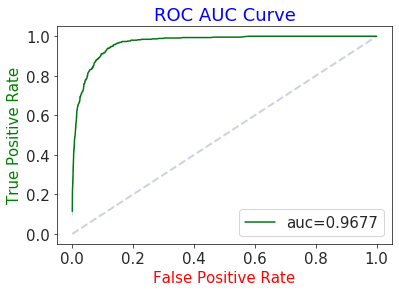

In [0]:
plt.title('ROC AUC Curve', color='blue')
plt.plot([0, 1], [0, 1], ls='--', lw=2, alpha=0.2)
ax = sns.lineplot(y=tpr_h2o, x=fpr_h2o, 
                  label="auc={0:.4f}".format(auc(x=fpr_h2o, y=tpr_h2o)))
ax.set_xlabel("False Positive Rate", color='r')
ax.set_ylabel("True Positive Rate", color='g')
plt.legend(loc='lower right');

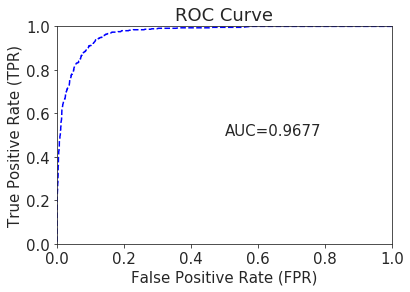

In [0]:
# ROC AUC Curve
y_tst_pred_gbm1.plot(type='roc')

> ---
> ---

In [0]:
print(y_tst_pred_gbm1.metric(metric='precision'),
y_tst_pred_gbm1.metric(metric='recall'))

[[0.7866309324771388, 1.0]] [[0.02344155887574368, 1.0]]


In [0]:
precision2 = y_tst_pred_gbm1.precision(thresholds=[i for i in np.arange(0.02, 1, 0.001)])
recall2 = y_tst_pred_gbm1.recall(thresholds=[i for i in np.arange(0.02, 1, 0.001)])

Could not find exact threshold 0.02; using closest threshold found 0.022083965166070047.
Could not find exact threshold 0.021; using closest threshold found 0.022083965166070047.
Could not find exact threshold 0.022000000000000002; using closest threshold found 0.022083965166070047.
Could not find exact threshold 0.023000000000000003; using closest threshold found 0.022946648001644115.
Could not find exact threshold 0.024000000000000004; using closest threshold found 0.024052141243320897.
Could not find exact threshold 0.025000000000000005; using closest threshold found 0.025142629067516912.
Could not find exact threshold 0.026000000000000006; using closest threshold found 0.026012987583264494.
Could not find exact threshold 0.027000000000000007; using closest threshold found 0.026933383298366094.
Could not find exact threshold 0.028000000000000008; using closest threshold found 0.02790024796984885.
Could not find exact threshold 0.02900000000000001; using closest threshold found 0.028

Could not find exact threshold 0.17900000000000013; using closest threshold found 0.17903826811414048.
Could not find exact threshold 0.18000000000000013; using closest threshold found 0.18039999900262857.
Could not find exact threshold 0.18100000000000013; using closest threshold found 0.18039999900262857.
Could not find exact threshold 0.18200000000000013; using closest threshold found 0.18252696307483396.
Could not find exact threshold 0.18300000000000013; using closest threshold found 0.18252696307483396.
Could not find exact threshold 0.18400000000000014; using closest threshold found 0.18497871085881443.
Could not find exact threshold 0.18500000000000014; using closest threshold found 0.18497871085881443.
Could not find exact threshold 0.18600000000000014; using closest threshold found 0.18667466660166246.
Could not find exact threshold 0.18700000000000014; using closest threshold found 0.18667466660166246.
Could not find exact threshold 0.18800000000000014; using closest thresho

Could not find exact threshold 0.3380000000000003; using closest threshold found 0.338904522082289.
Could not find exact threshold 0.3390000000000003; using closest threshold found 0.338904522082289.
Could not find exact threshold 0.3400000000000003; using closest threshold found 0.3405770627958389.
Could not find exact threshold 0.3410000000000003; using closest threshold found 0.3405770627958389.
Could not find exact threshold 0.3420000000000003; using closest threshold found 0.34178281442456343.
Could not find exact threshold 0.3430000000000003; using closest threshold found 0.3435648546252086.
Could not find exact threshold 0.3440000000000003; using closest threshold found 0.3435648546252086.
Could not find exact threshold 0.3450000000000003; using closest threshold found 0.3456044421781311.
Could not find exact threshold 0.3460000000000003; using closest threshold found 0.3456044421781311.
Could not find exact threshold 0.3470000000000003; using closest threshold found 0.345604442

Could not find exact threshold 0.49800000000000044; using closest threshold found 0.4982689380820737.
Could not find exact threshold 0.49900000000000044; using closest threshold found 0.4982689380820737.
Could not find exact threshold 0.5000000000000004; using closest threshold found 0.49980710615698287.
Could not find exact threshold 0.5010000000000004; using closest threshold found 0.5011885625191403.
Could not find exact threshold 0.5020000000000004; using closest threshold found 0.5011885625191403.
Could not find exact threshold 0.5030000000000004; using closest threshold found 0.5033869961706338.
Could not find exact threshold 0.5040000000000004; using closest threshold found 0.5033869961706338.
Could not find exact threshold 0.5050000000000004; using closest threshold found 0.5062632980417652.
Could not find exact threshold 0.5060000000000004; using closest threshold found 0.5062632980417652.
Could not find exact threshold 0.5070000000000005; using closest threshold found 0.50626

Could not find exact threshold 0.6600000000000006; using closest threshold found 0.6576183661169048.
Could not find exact threshold 0.6610000000000006; using closest threshold found 0.6576183661169048.
Could not find exact threshold 0.6620000000000006; using closest threshold found 0.6576183661169048.
Could not find exact threshold 0.6630000000000006; using closest threshold found 0.6667826253605681.
Could not find exact threshold 0.6640000000000006; using closest threshold found 0.6667826253605681.
Could not find exact threshold 0.6650000000000006; using closest threshold found 0.6667826253605681.
Could not find exact threshold 0.6660000000000006; using closest threshold found 0.6667826253605681.
Could not find exact threshold 0.6670000000000006; using closest threshold found 0.6667826253605681.
Could not find exact threshold 0.6680000000000006; using closest threshold found 0.6667826253605681.
Could not find exact threshold 0.6690000000000006; using closest threshold found 0.67102462

Could not find exact threshold 0.8220000000000007; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.8230000000000007; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.8240000000000007; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.8250000000000007; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.8260000000000007; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.8270000000000007; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.8280000000000007; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.8290000000000007; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.8300000000000007; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.8310000000000007; using closest threshold found 0.78663093

Could not find exact threshold 0.9840000000000009; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.9850000000000009; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.9860000000000009; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.9870000000000009; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.9880000000000009; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.9890000000000009; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.9900000000000009; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.9910000000000009; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.9920000000000009; using closest threshold found 0.7866309324771388.
Could not find exact threshold 0.9930000000000009; using closest threshold found 0.78663093

Could not find exact threshold 0.16300000000000012; using closest threshold found 0.16262058089252499.
Could not find exact threshold 0.16400000000000012; using closest threshold found 0.16462249728652956.
Could not find exact threshold 0.16500000000000012; using closest threshold found 0.16462249728652956.
Could not find exact threshold 0.16600000000000012; using closest threshold found 0.1658134392759782.
Could not find exact threshold 0.16700000000000012; using closest threshold found 0.16699708743212116.
Could not find exact threshold 0.16800000000000012; using closest threshold found 0.16816620375740118.
Could not find exact threshold 0.16900000000000012; using closest threshold found 0.16920587331873996.
Could not find exact threshold 0.17000000000000012; using closest threshold found 0.16920587331873996.
Could not find exact threshold 0.17100000000000012; using closest threshold found 0.171485145923697.
Could not find exact threshold 0.17200000000000013; using closest threshold 

Could not find exact threshold 0.3220000000000003; using closest threshold found 0.32253408157847435.
Could not find exact threshold 0.3230000000000003; using closest threshold found 0.32253408157847435.
Could not find exact threshold 0.3240000000000003; using closest threshold found 0.32500174611292926.
Could not find exact threshold 0.3250000000000003; using closest threshold found 0.32500174611292926.
Could not find exact threshold 0.3260000000000003; using closest threshold found 0.3266507154429408.
Could not find exact threshold 0.3270000000000003; using closest threshold found 0.3266507154429408.
Could not find exact threshold 0.3280000000000003; using closest threshold found 0.32819555418209834.
Could not find exact threshold 0.3290000000000003; using closest threshold found 0.32819555418209834.
Could not find exact threshold 0.3300000000000003; using closest threshold found 0.33010968215861036.
Could not find exact threshold 0.3310000000000003; using closest threshold found 0.3

Could not find exact threshold 0.48200000000000043; using closest threshold found 0.4824209794343745.
Could not find exact threshold 0.48300000000000043; using closest threshold found 0.4824209794343745.
Could not find exact threshold 0.48400000000000043; using closest threshold found 0.4843986190552717.
Could not find exact threshold 0.48500000000000043; using closest threshold found 0.4843986190552717.
Could not find exact threshold 0.48600000000000043; using closest threshold found 0.48569288835891444.
Could not find exact threshold 0.48700000000000043; using closest threshold found 0.48779597253668616.
Could not find exact threshold 0.48800000000000043; using closest threshold found 0.48779597253668616.
Could not find exact threshold 0.48900000000000043; using closest threshold found 0.48779597253668616.
Could not find exact threshold 0.49000000000000044; using closest threshold found 0.4903655500724844.
Could not find exact threshold 0.49100000000000044; using closest threshold fo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
prec2 = [p[1] for p in precision2]
rec2 = [r[1] for r in recall2]

In [0]:
len(prec2), len(rec2)

(980, 980)

In [0]:
pos_label = 'yes'
pr_auc2 = auc(x=rec2, y=prec2)  

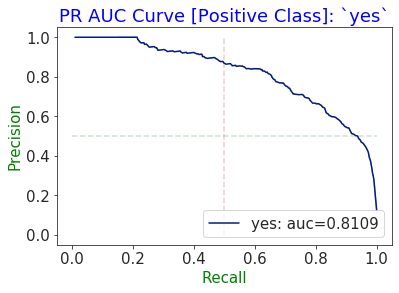

In [0]:
# http://www.chioka.in/differences-between-roc-auc-and-pr-auc/
ax = sns.lineplot(y=prec2, x=rec2, 
                  label="{0}: auc={1:.4f}".format(pos_label, pr_auc2))
ax.set_xlabel("Recall", color='g')
ax.set_ylabel("Precision", color='g')
plt.title(f'PR AUC Curve [Positive Class]: `{pos_label}`', color='blue')
plt.plot([0, 1], [0.5, 0.5], linestyle='--', alpha=0.2)
plt.plot([0.5, 0.5], [0, 1], linestyle='--', alpha=0.2)
plt.legend(loc='lower right');

> ---
> ---

In [0]:
print(df_bank_h2o_tst.names)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'deposit_subscribed']


In [0]:
y_tst_pred_gbm = gbm_grid_f1.models[0].predict(df_bank_h2o_tst.drop([target_column], axis=1))

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [0]:
y_tst_pred_gbm

predict,no,yes
no,0.856013,0.143987
no,0.973758,0.0262416
no,0.976615,0.023385
no,0.977808,0.0221918
no,0.975791,0.0242092
no,0.931854,0.0681463
yes,0.503829,0.496171
no,0.975973,0.0240269
no,0.975921,0.0240792
no,0.977835,0.0221646


In [0]:
y_test_true = list(df_bank_h2o_tst.as_data_frame()[target_column])
y_test_pred = list(y_tst_pred_gbm.as_data_frame()['predict'])
y_test_proba = y_tst_pred_gbm.as_data_frame()

In [0]:
len(y_test_true), len(y_test_pred), y_test_proba.shape

(4119, 4119, (4119, 3))

In [0]:
print(classification_report(y_true=y_test_true, y_pred=y_test_pred))

              precision    recall  f1-score   support

          no       0.97      0.96      0.96      3668
         yes       0.69      0.77      0.73       451

    accuracy                           0.94      4119
   macro avg       0.83      0.86      0.85      4119
weighted avg       0.94      0.94      0.94      4119



In [0]:
cm = confusion_matrix(y_true=y_test_true, y_pred=y_test_pred)

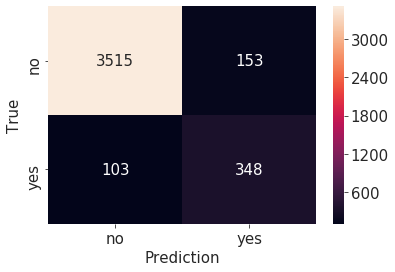

In [0]:
ax = sns.heatmap(cm, annot=True, fmt='d');
ax.set_ylabel("True")
ax.set_xlabel("Prediction")
ax.set_xticklabels(['no', 'yes'])
ax.set_yticklabels(['no', 'yes']);

In [0]:
print(roc_auc_score(y_test_true, y_test_proba['yes']))

0.9677361830126678


In [0]:
print("F1 Score: ", f1_score(y_true=y_test_true, 
                             y_pred=y_test_pred,
                             labels=['yes', 'no'],
                             pos_label='no',
                             average='binary'))

F1 Score:  0.9648641229755696


### ROC AUC Curve

In [0]:
oh_enc = OneHotEncoder(drop=None, dtype=int)

In [0]:
y_test_true1 = oh_enc.fit_transform(np.array(y_test_true).reshape((-1, 1)))
print(y_test_true1.shape)
print(oh_enc.categories_[0])
print(Counter(y_test_true1.toarray()[:, 0]), Counter(y_test_true1.toarray()[:, 1]))

(4119, 2)
['no' 'yes']
Counter({1: 3668, 0: 451}) Counter({0: 3668, 1: 451})


In [0]:
y_test_true1.toarray()[:3], y_test_true[:3]

(array([[1, 0],
        [1, 0],
        [1, 0]]), ['no', 'no', 'no'])

In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = {'no': 1, 'yes': 0}
for cn, idx in classes.items():
    print(cn)
    fpr[cn], tpr[cn], _ = roc_curve(y_test_true1.toarray()[:, idx], y_test_proba[cn], 
                                    pos_label=idx)
    roc_auc[cn] = auc(x=fpr[cn], y=tpr[cn])

no
yes


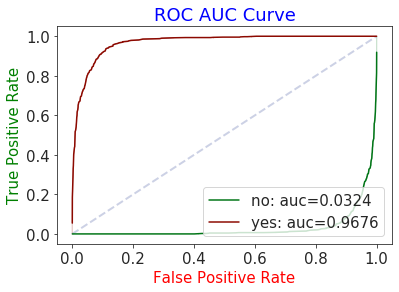

In [0]:
plt.title('ROC AUC Curve', color='blue')
plt.plot([0, 1], [0, 1], ls='--', lw=2, alpha=0.2)
for cn, idx in classes.items():
    ax = sns.lineplot(y=tpr[cn], x=fpr[cn], 
                 label="{0}: auc={1:.4f}".format(cn, roc_auc[cn]))
    ax.set_xlabel("False Positive Rate", color='r')
    ax.set_ylabel("True Positive Rate", color='g')
plt.legend(loc='lower right', frameon=True)

> ---
> ---

In [0]:
pos_label='yes'
fpr, tpr, _ = roc_curve(y_test_true,
                        y_test_proba[pos_label], 
                        pos_label=pos_label)
roc_auc = auc(x=fpr, y=tpr)

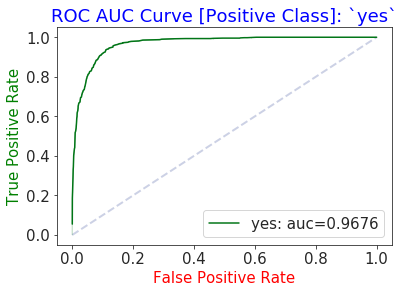

In [0]:
plt.title(f'ROC AUC Curve [Positive Class]: `{pos_label}`', color='blue')
plt.plot([0, 1], [0, 1], ls='--', lw=2, alpha=0.2)

ax = sns.lineplot(y=tpr, x=fpr,                  
                  label="{0}: auc={1:.4f}".format(pos_label, roc_auc))
ax.set_xlabel("False Positive Rate", color='r')
ax.set_ylabel("True Positive Rate", color='g')
plt.legend(loc='lower right', frameon=True);

### PR AUC Curve
> https://www.kaggle.com/general/7517#post41179

In [0]:
precision = dict()
recall = dict()
classes = {'no': 1, 'yes': 0}
pos_label = [0, 1]
average_precision = dict()
for idx, (cn, label) in enumerate(classes.items()):
    precision[cn], recall[cn], _ = \
            precision_recall_curve(y_true=y_test_true1.toarray()[:, idx], 
                                   probas_pred=y_test_proba[cn],
                                   pos_label=pos_label[idx])
    average_precision[cn] = average_precision_score(y_true=y_test_true1.toarray()[:, idx],
                                                    y_score=y_test_proba[cn],
                                                    pos_label=pos_label[idx])

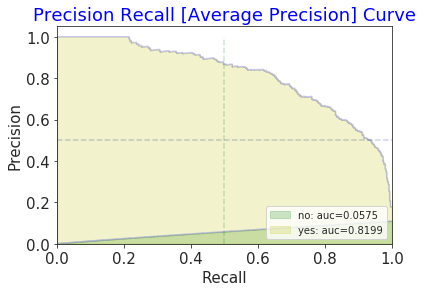

In [0]:
# print(plt.style.available)
for color, (cn, label) in list(zip(['g', 'y'], classes.items())):
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(x=recall[cn], y=precision[cn], color='b', alpha=0.2,
             where='post')
    plt.fill_between(x=recall[cn], y1=precision[cn], alpha=0.2, color=color,
                     label="{0}: auc={1:.4f}".format(cn, average_precision[cn]), **step_kwargs)
    

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.plot([0, 1], [0.5, 0.5], linestyle='--', alpha=0.2)
plt.plot([0.5, 0.5], [0, 1], linestyle='--', alpha=0.2)
plt.legend(loc='lower right', fontsize=10)
plt.style.use('seaborn-dark-palette')
plt.title("Precision Recall [Average Precision] Curve", color='blue');

> ---
> ---

In [0]:
pos_label = 'yes'
prec, rec, _ = precision_recall_curve(y_true=y_test_true,
                                      probas_pred=y_test_proba[pos_label],
                                      pos_label=pos_label)

pr_auc = auc(x=rec, y=prec)                                                                                                

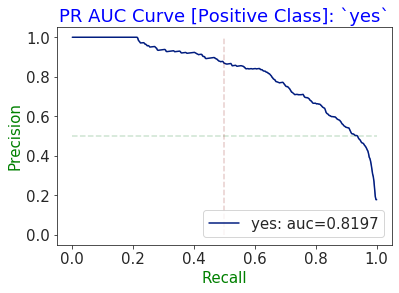

In [0]:
# http://www.chioka.in/differences-between-roc-auc-and-pr-auc/
ax = sns.lineplot(y=prec, x=rec, 
                  label="{0}: auc={1:.4f}".format(pos_label, pr_auc))
ax.set_xlabel("Recall", color='g')
ax.set_ylabel("Precision", color='g')
plt.title(f'PR AUC Curve [Positive Class]: `{pos_label}`', color='blue')
plt.plot([0, 1], [0.5, 0.5], linestyle='--', alpha=0.2)
plt.plot([0.5, 0.5], [0, 1], linestyle='--', alpha=0.2)
plt.legend(loc='lower right');

> ---
> --- 


In [0]:
precision_dict = dict()
recall_dict = dict()
pr_auc_dict = dict()
pos_label = [0, 1]
classes = {'no': 1, 'yes': 0}
for idx, (cn, label) in enumerate(classes.items()):
    print(cn)
    precision_dict[cn], recall_dict[cn], _ = precision_recall_curve(y_true=y_test_true1.toarray()[:, idx], 
                                                                    probas_pred=y_test_proba[cn], 
                                                                    pos_label=pos_label[idx])
    pr_auc_dict[cn] = auc(x=recall_dict[cn], y=precision_dict[cn])

no
yes


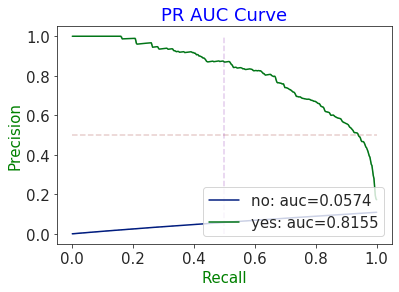

In [0]:
# http://www.chioka.in/differences-between-roc-auc-and-pr-auc/
plt.title('PR AUC Curve', color='blue')
for cn, idx in classes.items():
    ax = sns.lineplot(y=precision_dict[cn], x=recall_dict[cn], 
                 label="{0}: auc={1:.4f}".format(cn, pr_auc_dict[cn]))
    ax.set_xlabel("Recall", color='g')
    ax.set_ylabel("Precision", color='g')


plt.plot([0, 1], [0.5, 0.5], linestyle='--', alpha=0.2)
plt.plot([0.5, 0.5], [0, 1], linestyle='--', alpha=0.2)
plt.legend(loc='lower right');